In [1]:
import flexpart_management.notebooks.release_ds_v3.release_ds_v3_lfc as lfc
from flexpart_management.notebooks.release_ds_v3.release_ds_v3_lfc import *

reload


2020-12-17 13:58:43,969 useful_scit  WARNING  rpy2 not installed. Everything works except functions requiring r


2020-12-17 13:58:43,969 useful_scit  WARNING  rpy2 not installed. Everything works except functions requiring r


In [ ]:


def main():

In [2]:
    ds = get_dcc().load()

In [3]:
    b1 = ds[co.R_CENTER] > .10
    b2 = ds[co.R_CENTER] < .25
    t1 = ds[co.TH_CENTER] > 5 * np.pi/6
    t2 = ds[co.TH_CENTER] < 7.5 * np.pi/6

In [4]:
    _rt = {co.R_CENTER:(b1 & b2),co.TH_CENTER: (t1 & t2)}
    dlp0 = ds[{**_rt, co.ZM:[0]}]
    dlp1 = ds[{**_rt, co.ZM:[0,1]}]
    dlp2 = ds[{**_rt, co.ZM:[0,1,2]}]
    dlpt = ds[{**_rt}]

In [5]:
    dls = [dlp0,dlp1,dlp2,dlpt]
    dss = ['lp0','lp1','lp2','lpt']
    # s = splot(figsize=(20,4))
    df = pd.DataFrame([])
    for dl,dds in zip(dls,dss):
        ser = dl.sum(NRL).to_dataframe()[CO]
        df[dds] = ser
        # ser[CO].to_dataframe().plot(ax=s.ax)
    # plt.show()
    # df = df / df.mean()

In [6]:
    df_ts = import_time_series()
    df_ts[co.RL] = df_ts.index
    df_ts = df_ts.set_index(co.RL)

In [7]:
    df_ts = df_ts.resample('H').mean()

In [8]:
    csv = xr.open_dataset(pjoin(co.tmp_data_path,'cluster_series_v3.nc'))

In [9]:
    s7 = csv['conc_lab_nc18'].loc[{N18:'07_SR',NORM:0,ZCOL:'BL'}].to_dataframe()[CL18]
    t7 = csv['conc_lab_nc18'].loc[{N18:'07_SR',NORM:0,ZCOL:'ALL'}].to_dataframe()[CL18]

In [10]:
    s07=ds[CO][{co.ZM:[0]}].where(ds[N18]=='07_SR').sum(NRL).to_dataframe()
    s12=ds[CO][{co.ZM:[0]}].where(ds[N18]=='12_SR').sum(NRL).to_dataframe()
    s11=ds[CO][{co.ZM:[0]}].where(ds[N18]=='11_SR').sum(NRL).to_dataframe()
    s04=ds[CO][{co.ZM:[0]}].where(ds[N18]=='04_SR').sum(NRL).to_dataframe()
    s02=ds[CO][{co.ZM:[0]}].where(ds[N18]=='02_SR').sum(NRL).to_dataframe()
    s10=ds[CO][{co.ZM:[0]}].where(ds[N18]=='10_SR').sum(NRL).to_dataframe()



In [11]:
    surf = ds[CO][{co.ZM:[0]}].loc[{co.R_CENTER:slice(0,.30)}].sum(NRL).to_dataframe()

In [12]:

    df['s7'] = s7
    df['t7'] = t7
    df['s07'] = s07
    df['BC'] = df_ts['BC']
    df[c91] = df_ts[c91]
    df['surf'] = surf
    df['s12'] = s12
    df['s11'] = s11
    df['s04'] = s04
    df['s02'] = s02
    df['s10'] = s10

In [13]:

    df_ts = import_time_series()
    df_ts

,Time_LT,month,day,Temperature_station,Pressure_station,RH_station,BC,Potential temperature,Equivalent potential temperature,water mixing ratio,...,C4_C5_compounds,C6_C8_compounds,C9_C13_compounds,Total_org,Total_CHO,Total_CHON,C45_Total_ratio,C68_Total_ratio,C9more_Total_ratio,CHON_total_ratio
time_utc,,,,,,,,,,,,,,,,,,,,,
2017-12-01 04:00:00.000,2017-12-01 00:00:00.000,12,1,2.000000,542.740000,60.300000,NaN,327.582353,344.106884,4.920181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:10:00.000,2017-12-01 00:10:00.000,12,1,1.933333,542.720000,59.566667,NaN,327.506427,355.201924,4.836786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:20:00.000,2017-12-01 00:20:00.000,12,1,1.433333,542.650000,59.866667,NaN,326.923176,353.444533,4.689681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:30:00.000,2017-12-01 00:30:00.000,12,1,0.500000,542.530000,61.200000,NaN,325.832502,350.304901,4.481914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:40:00.000,2017-12-01 00:40:00.000,12,1,0.100000,542.603333,57.933333,NaN,325.343675,348.831748,4.118577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-01 03:00:00.002,2018-05-31 23:00:00.002,5,31,-1.400000,542.340000,17.400000,106.0,323.602539,335.827611,1.103882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01 03:10:00.002,2018-05-31 23:10:00.002,5,31,-1.666667,542.360000,17.666667,120.0,323.281587,335.339754,1.098983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01 03:20:00.002,2018-05-31 23:20:00.002,5,31,-1.766667,542.376667,17.433333,157.0,323.159673,335.016611,1.076437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
    # df = ser.to_dataframe().reset_index()
    # df['LT']  = df[co.RL] - pd.Timedelta('4H')
    # from bokeh.plotting import figure, output_file, show
    # import bokeh
    # from bokeh.models import ColumnDataSource
    # from bokeh.palettes import Dark2_5 as palette
    # output_file('/tmp/my_first_graph.html')
    # p = figure(x_axis_type='datetime',plot_width=1000, plot_height=500)
    # source = ColumnDataSource(df)
    #
    # p.line(x='LT', y=CO, source=source, )
    # p.line(x='Time_LT', y=c91, source=df_ts, color = palette[1])
    # show(p)

In [15]:
    # bcc = df_ts[['RH_station']].resample('H').mean().dropna()
    bcc = df_ts[['BC']].resample('H').mean().dropna()
    bc = bcc['BC']

In [16]:
    import sklearn.preprocessing as pre
    bcT = pre.QuantileTransformer(
        output_distribution='normal',n_quantiles=100)\
        .fit_transform(bcc.values)
    bcL = pre.QuantileTransformer(n_quantiles=100) \
        .fit_transform(bcc.values)

In [17]:
    bcc['bcT'] = bcT
    bcc['bc2'] = bcT+2
    bcc.index.name=co.RL

In [18]:
    # s = splot(3,squeeze=False)
    # ax0,ax1,ax2 = s.axf[0],s.axf[1],s.axf[2]
    # x1 = 3
    # x2 = 5000
    # bins = np.geomspace(x1,x2,10)
    # bins = [0,*bins[1:-1],np.max([bc.max()+1,bins[-1]])]
    # ax0.hist(bc, bins=bins)
    # ax0.set_xlim(x1,x2)
    # ax0.set_xscale('log')
    # ax0.set_title('log')
    # ax1.hist(bc,bins=100)
    # ax1.set_title('normal')
    #
    # ax2.hist(bcT)
    # ax2.set_title('bc quantile')
    # s.f.tight_layout()
    # plt.show()

In [19]:
    dsc = xr.open_dataset(
        pjoin(co.tmp_data_path,'cluster_series_v3.nc'))

In [20]:
    ser = dsc['conc_lab_nc18'].loc[{'z_column':'BL','normalized':0}]

In [21]:
    import sklearn.linear_model as lm
    reg = lm.ElasticNet(
        positive=True,)

In [22]:
    su = ds[{co.ZM:[0]}].sum([co.RL,co.ZM])

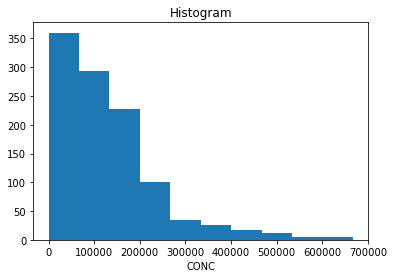

In [23]:
    su[co.CONC].plot.hist()
    plt.show()

In [24]:
    sun = ds[{co.ZM:0}]/su
    # sun = ds/ds.sum(co.RL)

In [25]:
    dsun = sun.to_dataframe()[co.CONC]
    dsun = dsun[~dsun.isnull()]

In [26]:
    du = dsun.unstack().T

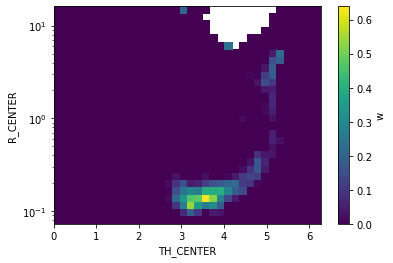

In [27]:
    # bcc['rat'] = (bcc['C4_C5_compounds']/bcc['C9_C13_compounds'])[bcc['C9_C13_compounds']>0]
    # buc = bcc[['RH_station']]['2017-12-06':'2018-05-31'].dropna().copy()
    buc = bcc[['BC']]['2017-12-06':'2018-05-31'].dropna().copy()
    duc = du.loc[buc.index].copy()

    reg = lm.ElasticNet(positive=True,alpha=.17,fit_intercept=False)
    reg.fit(duc,buc)
    we = pd.DataFrame(reg.coef_, index=duc.T.index,columns=['w'])
    we.to_xarray()['w'].plot()
    ax = plt.gca()
    ax.set_yscale('log')
    plt.show()

/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "1" already exists
  warnings.warn(msg, RuntimeWarning)
/Use

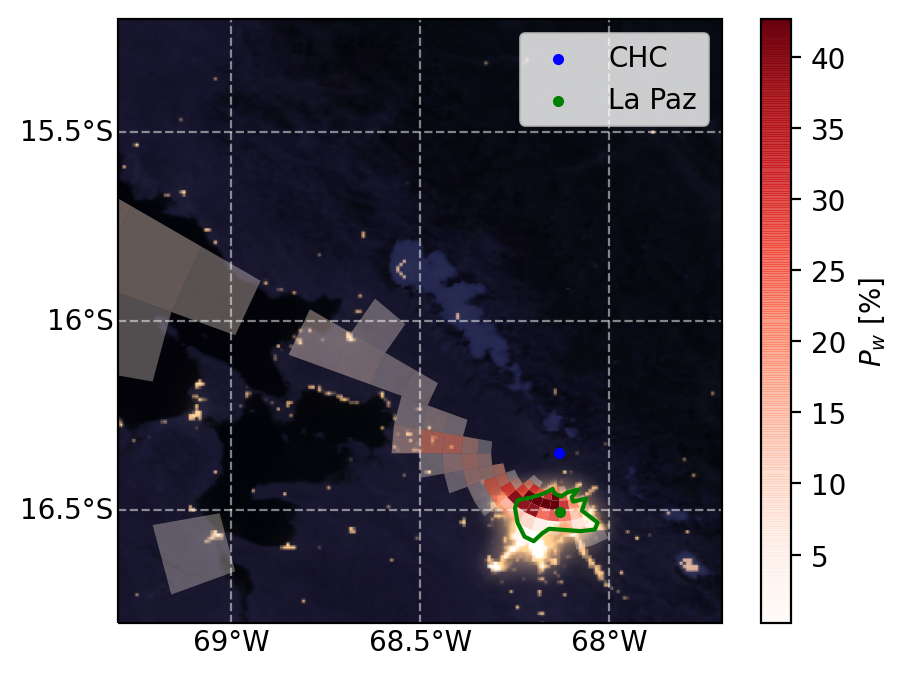

In [39]:
    import cartopy
    dd = .8 
    lo_c = -68.5
    la_c = -16
    lom = lo_c-dd
    loM = lo_c+dd
    lam = la_c-dd
    laM = la_c+dd
    ww='$P_w$ [%]'
    goo = xr.merge([su,we.to_xarray()])*100
    goo = goo.rename({'w':ww})
    ax = fa.get_ax_lapaz(
        fig_args={'figsize':(5,4),'dpi':200},
        chc_lp_legend=True,
        lalo_extent=[lom,loM,lam,laM],
        lola_ticks=[[-69.0,-68.5,-68.0],[-16.5,-16.0,-15.5]],
        y_left_lab=True,
        map_line_alpha=1,
        borders=False,
        plot_cities=False,
        lake_face_color=cartopy.feature.COLORS['water'],
        grid_color='white'
    )
    
    fa.logpolar_plot(goo[ww], ax=ax,name=ww)
    ax.plot(co.lola_la_paz_pol[:, 0], co.lola_la_paz_pol[:, 1],c='g')
#     ax.get_legend().remove()


    base_uri = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'

    layer_name ='VIIRS_Black_Marble'

    # Create a Cartopy crs for plain and rotated lat-lon projections.
    plain_crs = ccrs.PlateCarree()


#     fig = plt.figure(dpi=300)
    
#     la,lo = -16.4897, -68.1193

    dd = 1
    # Plot WMTS data in a specific region, over a plain lat-lon map.
#     ax = fig.add_subplot(1, 2, 1, projection=plain_crs)
#     ax.set_extent([lo-dd, lo+dd, la-dd, la+dd], crs=ccrs.PlateCarree())
#     ax.coastlines(resolution='50m', color='yellow')
#     ax.gridlines(color='lightgrey', linestyle='-')
    # Add WMTS imaging.
    ax.add_wmts(base_uri, layer_name=layer_name, wmts_kwargs={'time': '2016-01-01'})

    plt.show()

    ax.figure.savefig('bams_lapaz_bc.pdf')

In [30]:
if __name__ == '__main__':
    main()

IndentationError: expected an indented block (<ipython-input-30-98e28e805f3c>, line 34)

/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "1" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "2" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "3" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "4" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "5" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/owslib/wm

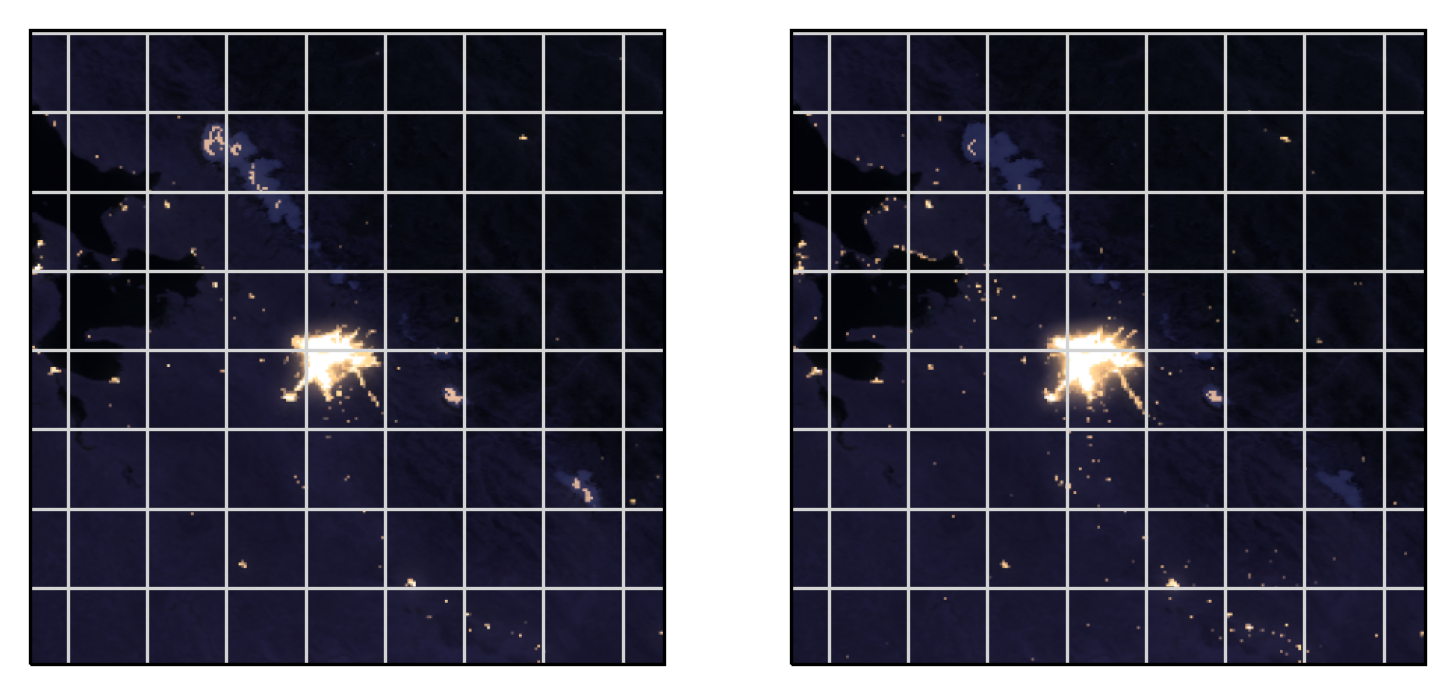

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def plot_city_lights():
    # Define resource for the NASA night-time illumination data.
    base_uri = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'

    layer_name ='VIIRS_Black_Marble'

    # Create a Cartopy crs for plain and rotated lat-lon projections.
    plain_crs = ccrs.PlateCarree()


    fig = plt.figure(dpi=300)
    
    la,lo = -16.4897, -68.1193

    dd = 1
    # Plot WMTS data in a specific region, over a plain lat-lon map.
    ax = fig.add_subplot(1, 2, 1, projection=plain_crs)
    ax.set_extent([lo-dd, lo+dd, la-dd, la+dd], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', color='yellow')
    ax.gridlines(color='lightgrey', linestyle='-')
    # Add WMTS imaging.
    ax.add_wmts(base_uri, layer_name=layer_name, wmts_kwargs={'time': '2012-01-01'})

#     layer_name ='VIIRS_Black_Marble'
    
    
    ax = fig.add_subplot(1, 2, 2, projection=plain_crs)
    ax.set_extent([lo-dd, lo+dd, la-dd, la+dd], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', color='yellow')
    ax.gridlines(color='lightgrey', linestyle='-')
    # Add WMTS imaging.
    ax.add_wmts(base_uri, layer_name=layer_name, wmts_kwargs={'time': '2016-01-01'})

    plt.show()


if __name__ == '__main__':
    plot_city_lights()